# 邏輯回歸


![alt text](https://alexandrenesovic.files.wordpress.com/2020/05/linear-regression-vs-logistic-regression.png?w=700)




* 使用Keras中的 mnist 數字手寫資料集
* 此數據集以分為訓練與測試集，各六萬與一萬張，每張圖像大小為28×28，為一維的灰階數字手寫圖像

## 資料讀取
* 使用 keras.datasets 中的 mnist.load_data()匯入數字手寫資料
* 使用 collections 中的 Counter 可以計算資料中的每個個數
* 使用 matplotlib 中的 matshow 在圖像以矩陣方式顯示


In [0]:
from keras.datasets import mnist
import numpy as np

# 讀入 MNIST
(x_train_image, y_train_label),(x_test_image, y_test_label) = mnist.load_data() 

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
from collections import Counter

print("訓練集的特徵維度", x_train_image.shape)
print("訓練集類別數量：%s" %Counter(y_train_label))
print("測試集的特徵維度", x_test_image.shape)
print("訓練集類別數量：%s" %Counter(y_test_label))

訓練集的特徵維度 (60000, 28, 28)
訓練集類別數量：Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
測試集的特徵維度 (10000, 28, 28)
訓練集類別數量：Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


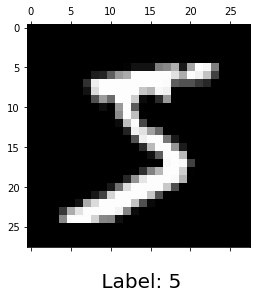

In [0]:
import matplotlib.pyplot as plt

first_train_label = y_train_label[0]
first_train_img = x_train_image[0, :]
plt.matshow(first_train_img, cmap = plt.get_cmap('gray'))
plt.xlabel("\n Label: %s" %(first_train_label), size=20)
plt.show()

In [0]:
x_train = x_train_image.reshape(60000, 28*28).astype('float32')
print(x_train.shape)
x_test = x_test_image.reshape(10000, 28*28).astype('float32')
print(x_test.shape)

(60000, 784)
(10000, 784)


## 建立邏輯回歸模型
* 模型初始化
* sklearn 使用 confusion_matrix 顯示混淆矩陣
* sklearn 使用 accuracy_score 計算準確度
* seaborn 使用 heatmap 繪製熱圖

In [0]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(max_iter=1000,C=0.1,penalty='l2', random_state=0)
LG.fit(x_train, y_train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

predictions = LG.predict(x_test)
cm = confusion_matrix(y_test_label, predictions)
acc = accuracy_score(y_test_label, predictions)

print("準確度:", acc)
print("混淆矩陣:\n", cm)

準確度: 0.9202
混淆矩陣:
 [[ 955    0    3    2    1    5    6    4    4    0]
 [   0 1111    8    3    0    1    3    2    7    0]
 [   5   14  915   20   12    6   11    9   37    3]
 [   3    1   19  921    2   22    3   11   22    6]
 [   3    3    5    4  910    0   11    6    9   31]
 [  12    5    3   36   12  758   19    6   34    7]
 [  10    3    8    2    7   17  907    1    3    0]
 [   4    7   25    8    5    2    0  944    3   30]
 [   7   14    6   20    8   24   10   13  860   12]
 [   7    6    2    9   22    7    1   23   11  921]]


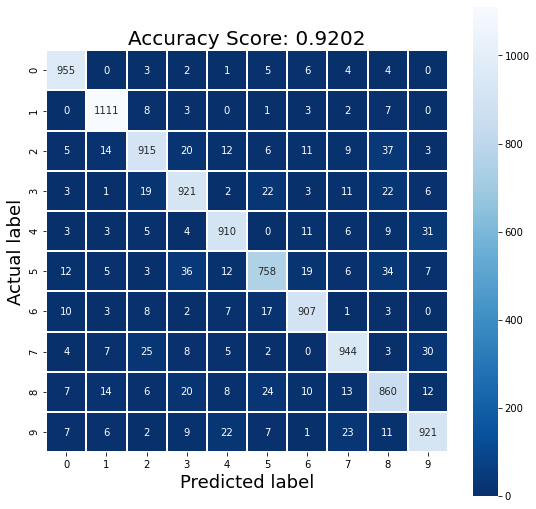

In [0]:
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1.0, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 18);
plt.xlabel('Predicted label', size = 18);
plt.title('Accuracy Score: {0}'.format(acc), size = 20);

## 儲存與讀取模型
* 讀取影像方式並轉成陣列
  1. matplotlib 中的 imread
  2. PIL 中的 Image.open
  3. OpenCV(cv2) 中的 imread

(50, 50)


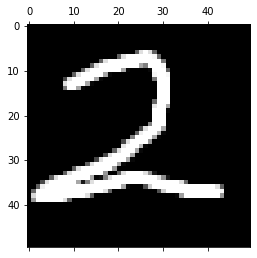

預測數字為： 2


In [0]:
from sklearn.externals import joblib 

#儲存Model
joblib.dump(LG, 'Logistic_Regression_mnist.pkl')

#讀取Model
LG = joblib.load('Logistic_Regression_mnist.pkl')

#測試Model
#第一種讀取影像方式
image_test = plt.imread('2.png')

#第二種讀取影像方式
from PIL import Image
img = Image.open('2.png').convert('L')

#第三種讀取影像方式
import cv2
img = cv2.imread('2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

#打印圖片
plt.matshow(img, cmap = plt.get_cmap('gray'))
plt.show()

re_img = cv2.resize(img, (28,28))
re_img = re_img.reshape(1, 28*28).astype('float32')

predictions = LG.predict(re_img)
print("預測數字為：", predictions[0])